# 토픽모델링 (Topic Modeling)

#0 환경

# 1 잠재의미분석 (Latent Semantic Analysis LSA)

## 1.1 직접 구현

###1) 직접 구현

In [ ]:
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import randomized_svd

class LSA:
    def __init__(self, doc_ls, topic_num):
      self.doc_ls = doc_ls
      self.topic_num = topic_num

      self.term2idx, self.idx2term = self.toIdxDict( ' '.join(doc_ls).split())

      self.doc2idx, self.idx2doc = self.toIdxDict(doc_ls)

      self.tdm  = self.TDM(doc_ls)
      self.U, self.s, self.VT = self.SVD(self.tdm)
      
      self.term_mat = self.TermVectorMatrix(self.U, self.s, topic_num)
      self.doc_mat = self.DocVectorMatrix(self.s, self.VT, topic_num)

      self.term_doc_mat = self.TermDocVectorMatrix(self.U, self.s, self.VT, topic_num)

    # 리스트내 값을 index로 변환하는 dict과 
    # index를 리스트내 값으로 변환하는 dict
    def toIdxDict(self, ls):
      any2idx = defaultdict(lambda : len(any2idx))
      idx2any = defaultdict()

      for item in ls:
        any2idx[item]
        idx2any[any2idx[item]] = item

      return any2idx, idx2any

    
    def TDM(self, doc_ls):
      tdm = np.zeros([len(self.term2idx), len(doc_ls)])
      for doc_idx, doc in enumerate(doc_ls):
        for term in doc.split():
          tdm[self.term2idx[term], doc_idx] += 1

      return tdm
        
    
    # 특이값 분해
    def SVD(self, tdm):
      U, s, VT = randomized_svd(tdm, n_components = 6, n_iter=20, random_state=None)
      return U, s, VT


    # 토픽별 주요 키워드 출력
    def TopicModeling(self, topic_num = 3):
      for i in range(topic_num):
        score = self.U[:, i:i+1].T
        sorted_index = np.argsort(-score)

        a = []
        for j in sorted_index[0, : topic_num]:
          a.append((self.idx2term[j], score[0, j].round(3)))

        print("Topic {} - {}".format(i + 1, a))

    
    def TermDocVectorMatrix(self, u, s, vt, topic_num):
      term_doc_mat = np.matrix(u[:, :topic_num]) * np.diag(s[:topic_num]) * np.matrix(vt[:topic_num, :])
      return term_doc_mat  

    # 키워드를 입력했을 때 단어 벡터 반환
    def GetTermVector(self, term):
      vec = self.term_mat[self.term2idx[term]]
      print("{} = {}".format(term, vec))
      return vec
        
            
    # 문서를 입력했을 때 문서 벡터 반환
    def GetDocVector(self, doc):
      vec = self.doc_mat[self.doc2idx[doc]]
      print("{} = {}".format(doc, vec))
      return vec
    
    
    def TermVectorMatrix(self, u, s, topic_num):
      term_mat = np.matrix(u[:, :topic_num]) * np.diag(s[:topic_num]) 
      return term_mat
        
    def DocVectorMatrix(self, s, vt, topic_num):
      doc_mat = np.diag(s[:topic_num])  * np.matrix(vt[:topic_num, :])
      return doc_mat.T
        
    def GetTermSimilarity(self, term1, term2):
      sim = cosine_similarity(self.GetTermVector(term1), self.GetTermVector(term2))
      print('({},{}) term similarity = {}'.format(term1, term2, sim[0][0]))
      return sim
        
    def GetDocSimilarity(self, doc1, doc2):
      sim  = cosine_similarity(self.GetDocVector(doc1), self.GetDocVector(doc2))
      print('({},{}) doc similarity = {}'.format(doc1, doc2, sim[0][0]))
      return sim
    
    def Compression(self, round_num=0):        
      print(self.tdm)
      print(self.term_doc_mat.round(round_num))
        
        
    

In [ ]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]



lsa = LSA(doc_ls, 3)
X = lsa.TDM(doc_ls)
print(X)
print('== 토픽 모델링 ==')
lsa.TopicModeling(3)

print('\n== 단어 벡터 ==')
lsa.GetTermVector('사과')
lsa.GetTermVector('포도')
print('\n== 단어 유사도 ==')
lsa.GetTermSimilarity('사과','바나나')
lsa.GetTermSimilarity('사과','짜장면')
lsa.GetTermSimilarity('포도','짜장면')
lsa.GetTermSimilarity('사과','스시')
print('\n== 문서 벡터 ==')
lsa.GetDocVector('사과 포도')
lsa.GetDocVector('짜장면 짬뽕')
print('\n== 문서 유사도 ==')
lsa.GetDocSimilarity('사과 포도', '포도 바나나')
lsa.GetDocSimilarity('사과 포도', '바나나 사과 포도 포도 짜장면')
print('\n== 토픽 차원수로 압축 ==')
lsa.Compression(0)

[[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
== 토픽 모델링 ==
Topic 1 - [('포도', 0.697), ('짜장면', 0.486), ('사과', 0.348)]
Topic 2 - [('짜장면', 0.584), ('짬뽕', 0.356), ('김치', 0.337)]
Topic 3 - [('김치', 0.611), ('된장찌개', 0.264), ('김치찌개', 0.264)]

== 단어 벡터 ==
사과 = [[ 1.1233207  -0.47387139  0.03306518]]
포도 = [[ 2.24664139 -0.94774279  0.06613036]]

== 단어 유사도 ==
사과 = [[ 1.1233207  -0.47387139  0.03306518]]
바나나 = [[ 1.1233207  -0.473

### 2) 실습 템플릿

In [ ]:
class LSA :
  def __init__(self, doc_ls, topic_num):
    pass
  
  # tdm matrix 생성
  def TDM(self, doc_ls):
    pass
  
  # tdm matrix 특이값 분해(SVD)
  # U, s, Vt로 분해
  def SVD(self, tdm):
    pass
  
  # 토픽별 주요 키워드 출력
  def TopicModeling(self) :
    pass
  
  
  # 단어 벡터 행렬 생성 dot(U,s)  
  def TermVectorMatrix(self, u, s):
    pass
  
  # 문서 벡터 행렬 생성 dot(s,Vt).T 
  def DocVectorMatrix(self, s, vt):
    pass
  
  # 키워드를 입력했을 때 단어 벡터 반환
  def GetTermVector(self, term):
    pass
  
  # 문서를 입력했을 때 문서 벡터 반환
  def GetDocVector(self, doc):
    pass
  
  # 단어-문서 벡터 행렬 생성
  def TermDocVectorMatrix(self, u, s, vt):
    pass
  
  # 단어 벡터 행렬에서 단어 간 코사인 유사도 측정하여 행렬형태로 반환
  def TermSimilarityMatrix(self, term_vec_matrix):
    pass
  
  # 두개 단어를 입력했을 때 코사인 유사도 반환
  def GetTermSimilarity(self, term1, term2):
    pass
  
  # 문서 벡터 행렬에서 문서 간 코사인 유사도 측정하여 행렬형태로 반환
  def DocSimilarityMartrix(self, doc_vec_matrix):
    pass
  
  # 두개 문서를 입력했을 때 코사인 유사도 반환
  def GetDocSimilarity(self, doc1, doc2):
    pass

In [ ]:
doc_ls = ['바나나 사과 포도 포도',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수욕',
         '볶음밥 탕수욕',
         '짜장면 짬뽕',
         '라면 스시',
         '스시',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장',
         '비빔밥 김치'
         ]

lsa = LSA(doc_ls, 3)
lsa.TopicModeling()
lsa.GetTermSimilarity('사과','바나나')
lsa.GetTermSimilarity('사과','짜장면')
lsa.GetDocSimilarity('사과 포도', '포도 바나나')
lsa.GetDocSimilarity('사과 포도', '라면 스시')

## 1.2 sklearn 활용

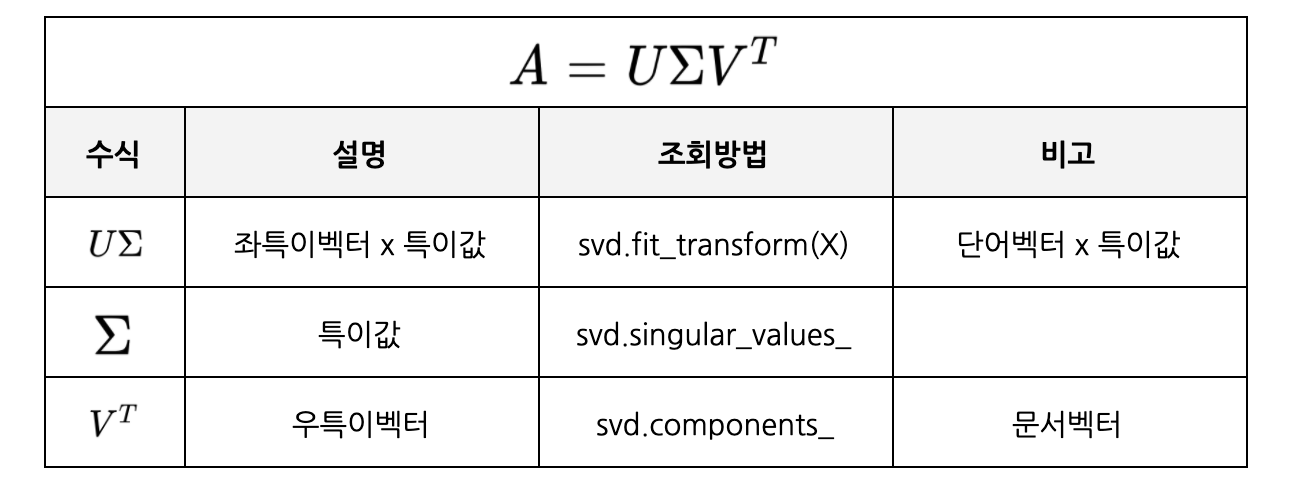

###1) 토픽모델링

In [ ]:
docs = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3

tfidf_vect = TfidfVectorizer(max_features=1000, max_df = 0.5, smooth_idf=True)
tfidf = tfidf_vect.fit_transform(docs)
svd = TruncatedSVD(n_components=n_topic, algorithm='randomized', n_iter=100)

U = svd.fit_transform(tfidf)
VT = svd.components_

In [ ]:
vocab = tfidf_vect.get_feature_names()
n = 3
for idx, topic in enumerate(VT):
  print("Topic {}: {}".format(idx, [ (vocab[i], topic[i].round(5)) for i in topic.argsort()[:-n -1:-1]  ]))

Topic 0: [('포도', 0.58251), ('짜장면', 0.49916), ('사과', 0.32971)]
Topic 1: [('짜장면', 0.43992), ('짬뽕', 0.39143), ('스시', 0.31495)]
Topic 2: [('스시', 0.70278), ('라면', 0.3528), ('가츠동', 0.25327)]


###2) 단어벡터

In [ ]:
for i in range(len(vocab)):
  print("{} : {}".format(vocab[i], VT.T[i]))

가츠동 : [0.03615365 0.06740048 0.25326653]
김치 : [ 0.10978603  0.15347979 -0.21577691]
김치찌개 : [ 0.01834125  0.03284554 -0.07776122]
된장 : [ 0.09862335  0.12078756 -0.09834554]
된장찌개 : [ 0.01834125  0.03284554 -0.07776122]
라면 : [0.05470036 0.09988705 0.35279702]
바나나 : [ 0.3297113  -0.28961955  0.01226021]
볶음밥 : [ 0.04131708  0.07490311 -0.12482955]
비빔밥 : [ 0.02775026  0.04867686 -0.10832038]
사과 : [ 0.3297113  -0.28961955  0.01226021]
소바 : [0.03615365 0.06740048 0.25326653]
스시 : [0.21640648 0.31494725 0.70278052]
짜장면 : [ 0.4991573   0.43992407 -0.07237264]
짬뽕 : [ 0.29964085  0.39142644 -0.29248516]
탕수육 : [ 0.1641898   0.23904844 -0.25719626]
포도 : [ 0.58250527 -0.51167464  0.02166027]


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
  def cosine_similarity(a, b):
    return dot(a, b)/(norm(a) * norm(b))
  
  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word):
    for j in range(i, n_word):
      similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)
  

  return similarity_matrix



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrixt):
  uniform_data = similarity_matrixt
  mask = np.triu(np.ones_like(similarity_matrixt, dtype=np.bool))
  plt.rcParams['figure.figsize'] = [8, 6]
  plt.rc('font', family="NanumBarunGothic")
  ax = sns.heatmap(uniform_data, mask=mask, #xticklabels=vocab, yticklabels=vocab, 
                   annot=True, fmt=".2f", annot_kws={'size':8}, cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


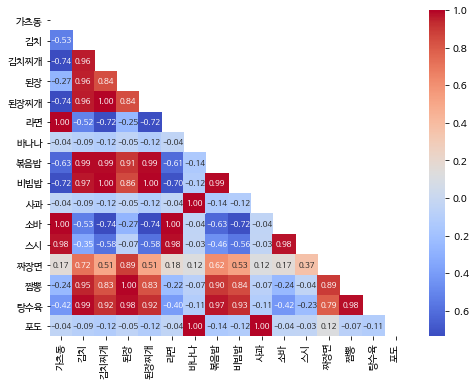

In [ ]:
word_vectors = svd.components_.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

###3) 문서벡터

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


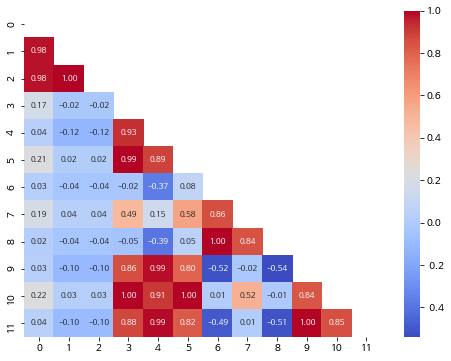

In [ ]:
doc_vectors = U
doc_similarity_matrix = calc_similarity_matrix(doc_vectors)
visualize_similarity(doc_similarity_matrix)

###4) 벡터 시각화

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)
  #labels = vocab

  plt.figure(figsize=(10, 6))
  plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:, 0], T[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
vectors = word_vectors
labels = vocab

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


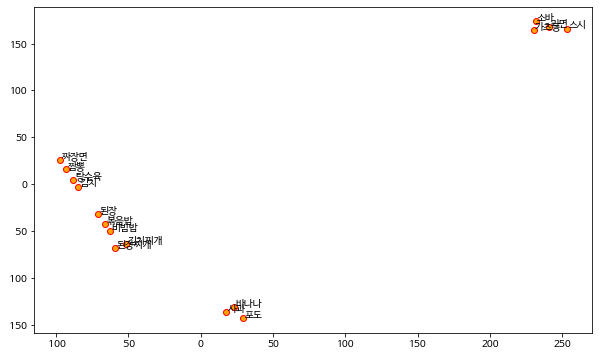

In [ ]:
visualize_vectors(vectors, labels)

###5) 파이프라인 사용

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def my_tokenizer(text):
  return [w for w in text.split() if len(w) > 1]

lsa_pipeline = Pipeline([('vect', CountVectorizer(tokenizer = my_tokenizer)),
                         ('tfidf', TfidfTransformer()),
                         ('lsa', TruncatedSVD(n_components=n_topic, algorithm='randomized', n_iter=100))])
lsa_pipeline.fit(docs)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function my_tokenizer at 0x7f380ec46e18>,
                                 vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('lsa',
                 TruncatedSVD(algorithm='randomized', n_components=3,
             

In [ ]:
lsa = lsa_pipeline.named_steps['lsa']
count_vect = lsa_pipeline.named_steps['vect']

In [ ]:
vocab = count_vect.get_feature_names()
def get_topics(components, feature_name, n=3):
  for idx, topic in enumerate(components):
    print("Topic {}: {}".format(idx, [ (feature_name[i], topic[i].round(5)) for i in topic.argsort()[:-n -1:-1]  ]))

get_topics(lsa.components_, vocab)

Topic 0: [('포도', 0.58251), ('짜장면', 0.49916), ('바나나', 0.32971)]
Topic 1: [('짜장면', 0.43992), ('짬뽕', 0.39143), ('스시', 0.31495)]
Topic 2: [('스시', 0.70278), ('라면', 0.3528), ('가츠동', 0.25327)]


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import random
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict

topic_indices = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

np.set_printoptions(precision=4, suppress=True)

class LDA:
  def __init__(self, docs, topic_num, alpha=0.1, beta=0.001):
    self.alpha = alpha
    self.beta = beta
    self.k = topic_num
    self.docs = docs

  def randomly_analysis_topic(self, docs):
    dic = defaultdict()
    t2i = defaultdict(lambda: len(t2i))
    i2t = defaultdict()

    porter = PorterStemmer()
    stopword = stopwords.words('english')
    stopword.append(',')
    index = 0

    for d, tokens in enumerate([word_tokenize(doc) for doc in docs]):
      for w, token in enumerate([porter.stem(token.lower()) for token in tokens if token not in stopword ]):
        i2t[t2i[token]] = token
        dic[(d, t2i[token], w)] = topic_indices[index]
        index += 1

    
    return dic, t2i, i2t


  def count_doc_topic(self, t2i):
    docs =np.zeros((self.k, len(self.docs)))
    terms = np.zeros((self.k, len(t2i.keys())))

    docs.fill(self.alpha)
    terms.fill(self.beta)

    for (d, n, w) in self.term_topic.keys():
      topic =self.term_topic[(d, n, w)]
      docs[topic, d] +=1
      terms[topic, n] += 1

    print('문서 토픽별 빈도')
    print(docs.round(1))
    print('단어 토픽별 빈도')
    print(terms.round(4))

    return docs, terms

  def iterate_assign_topic(self, docs, terms, i2t):
    prev = {}

    while prev != self.term_topic:
      for (d, n, w) in self.term_topic.keys():
        topic = [0, 0]

        docs[self.term_topic[(d, n, w)], d] -= 1
        terms[self.term_topic[(d, n, w)], n] -= 1

        print("\n{} (d:{}, n:{}, w:{}) = topic:{}".format(i2t[n], d, n, w, self.term_topic[(d, n, w)]))
        print('문서 토픽별 빈도')
        print(docs.round(1))
        print('단어 토픽별 빈도')
        print(terms.round(4))


        prev = self.term_topic

        for t in range(self.k):
          p_t_d = docs[t, d] / docs[:, d].sum()
          p_w_t = terms[t, n] / terms[t, :].sum()
          prob = p_t_d * p_w_t

          if topic[1] < prob:
            topic = [t, prob]

          print('topic {} 일 확률 = {}'.format(t, prob.round(4)))

        
        self.term_topic[(d, n, w)]  =topic[0]
        docs[topic[0], d] += 1
        terms[topic[0], n] += 1

        print('변경된 문서 토픽별 빈도')
        print(docs.round(1))
        print('변경된 단어 토픽별 빈도')
        print(terms.round(4))

        print('할당된 토픽 : {}'.format(self.term_topic[(d, n, w)]))
        print('=' * 50)

    return terms



  def topic_modeling(self, count=3):
    self.term_topic, t2i, i2t = self.randomly_analysis_topic(self.docs)
    print(self.term_topic)
    docs, terms = self.count_doc_topic(t2i)
    terms = self.iterate_assign_topic(docs, terms, i2t)

    score = terms / terms.sum(axis=1, keepdims=True)

    for i in range(self.k):
      print("\nTopic {}".format(i + 1))
      sorted_index = np.flip(np.argsort(score[i]), 0)[:count]
      for j in sorted_index:
        print("{} = {}".format(i2t[j], score[i, j].round(3)), end=' ')


In [ ]:
doc_ls = ["Cute kitty",
"Eat rice or cake",
"Kitty and hamster",
"Eat bread",
"Rice, bread and cake",
"Cute hamster eats bread and cake"]

lda = LDA(doc_ls, 2)
lda.topic_modeling(5)

defaultdict(None, {(0, 0, 0): 0, (0, 1, 1): 1, (1, 2, 0): 0, (1, 3, 1): 1, (1, 4, 2): 0, (2, 1, 0): 1, (2, 5, 1): 1, (3, 2, 0): 0, (3, 6, 1): 0, (4, 3, 0): 0, (4, 6, 1): 1, (4, 4, 2): 0, (5, 0, 0): 1, (5, 5, 1): 1, (5, 2, 2): 1, (5, 6, 3): 0, (5, 4, 4): 0})
문서 토픽별 빈도
[[1.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
단어 토픽별 빈도
[[1.001 0.001 2.001 1.001 3.001 0.001 2.001]
 [1.001 2.001 1.001 1.001 0.001 2.001 1.001]]

cute (d:0, n:0, w:0) = topic:0
문서 토픽별 빈도
[[0.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
단어 토픽별 빈도
[[0.001 0.001 2.001 1.001 3.001 0.001 2.001]
 [1.001 2.001 1.001 1.001 0.001 2.001 1.001]]
topic 0 일 확률 = 0.0
topic 1 일 확률 = 0.1146
변경된 문서 토픽별 빈도
[[0.1 2.1 0.1 2.1 2.1 2.1]
 [2.1 1.1 2.1 0.1 1.1 3.1]]
변경된 단어 토픽별 빈도
[[0.001 0.001 2.001 1.001 3.001 0.001 2.001]
 [2.001 2.001 1.001 1.001 0.001 2.001 1.001]]
할당된 토픽 : 1

kitti (d:0, n:1, w:1) = topic:1
문서 토픽별 빈도
[[0.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
단어 토픽별 빈도
[[0.001 0.001 2.001 1.001 3.001 0.001 2.001]

In [ ]:
nltk.download('stopwords')

NameError: ignored

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 12.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=b7196ccc00961e8a25bc6ea4bddeb0e0a7843b1bdc19d5ab41d181365e2dcb83
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=0138b1520755d85eee2b78d816d641c76187cf4b20ff6d4ac056b4a9fb384500
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as  pd
from sklearn.datasets import fetch_20newsgroups


def get_news():
  dataset = fetch_20newsgroups(shuffle=True, 
                               random_state=1, 
                               remove=('headers', 'footers', 'guotes'))
  documents = dataset.data

  news_df = pd.DataFrame({'document': documents})
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
  news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
  news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : x.lower())
  tokenized_doc = news_df['clean_doc'].apply(lambda x : x.split())

  stop_words = stopwords.words('english')

  return tokenized_doc.apply(lambda x : ' '.join([w for w in x if w not in stop_words]))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def my_tokenizer(text):
  return text.split()

tokenized_docs = get_news()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = LatentDirichletAllocation(n_components =20, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
?LatentDirichletAllocation

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

lda_pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=my_tokenizer)),
                         ('lda', LatentDirichletAllocation(n_components=20,
                                                           max_iter=20,
                                                           learning_method='online',
                                                           random_state=100))])
lda_pipeline.fit(tokenized_docs)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 use_idf=True, vocabulary=None)),
                ('lda',
                 LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                                           evaluate_every=-1,
                                           learning_decay=0.7,
      

In [ ]:
tfidf_vect = lda_pipeline.named_steps['tfidf_vect']
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = lda_pipeline.named_steps['lda']

vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)

# 실제로 전처리 해서 나타내보기 , 신문기사

In [3]:
import pandas as pd
news = pd.read_csv("C:/Users/User/Desktop/BOK/naver.csv")

In [9]:
from ekonlpy.sentiment import MPCK
mpck = MPCK()

UnicodeDecodeError: 'cp949' codec can't decode byte 0x80 in position 16: illegal multibyte sequence

In [8]:
from ekonlpy.tag import Mecab
mecab = Mecab()


UnicodeDecodeError: 'cp949' codec can't decode byte 0x80 in position 16: illegal multibyte sequence

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def tuning_hyperparams(train_data, n_jobs=-1):
  lda_pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=my_tokenizer)),
                         ('lda', LatentDirichletAllocation(max_iter=20,
                                                           learning_method='online',
                                                           random_state=100))])
  search_params = {'tfidf_vect__ngram_range': [(1, 1), (1, 2)],
                   'tfidf_vect__use_idf' : (True, False), 
                   'lda__n_components': [10, 20]}

  gs_lda = GridSearchCV(lda_pipeline, search_params, n_jobs=n_jobs)
  gs_lda = gs_lda.fit(train_data)

  print("Best parameters set:")
  best_parameters = gs_lda.best_estimator_.get_params()
  for param_name in sorted(list(best_parameters.keys())):
    print("\t{} : {}".format(param_name, best_parameters[param_name]))

  return gs_lda.best_estimator_


lda_pipeline = tuning_hyperparams(tokenized_docs)


NameError: name 'tokenized_docs' is not defined

In [ ]:
tfidf_vect = lda_pipeline.named_steps['tfidf_vect']
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = lda_pipeline.named_steps['lda']

vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)